In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Loading Data

In [2]:
df = pd.read_csv('../Credit_Card_Churn_Project/BankChurners.csv')

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
df.shape

(10127, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Check for duplicated data

In [8]:
df.duplicated().values.any()

False

Check for null data

In [9]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

,Total,Percentage
CLIENTNUM,0,0.0
Months_Inactive_12_mon,0,0.0
Total_Ct_Chng_Q4_Q1,0,0.0
Total_Trans_Ct,0,0.0
Total_Trans_Amt,0,0.0
Total_Amt_Chng_Q4_Q1,0,0.0
Avg_Open_To_Buy,0,0.0
Total_Revolving_Bal,0,0.0
Credit_Limit,0,0.0
Contacts_Count_12_mon,0,0.0


# Exploratory Data Analysis

Description of numerical data

In [10]:
numerical_features = df.drop(columns=['CLIENTNUM']).select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


Description of categorical data

In [11]:
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
cat_summary_stats

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [12]:
categorical_features['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [13]:
numerical_features['Attrited_Status'] = categorical_features['Attrition_Flag'].apply(lambda x : 1 if x == 'Attrited Customer' else 0)
numerical_features['Attrited_Status'] = numerical_features['Attrited_Status'].astype('category')
numerical_features.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited_Status
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


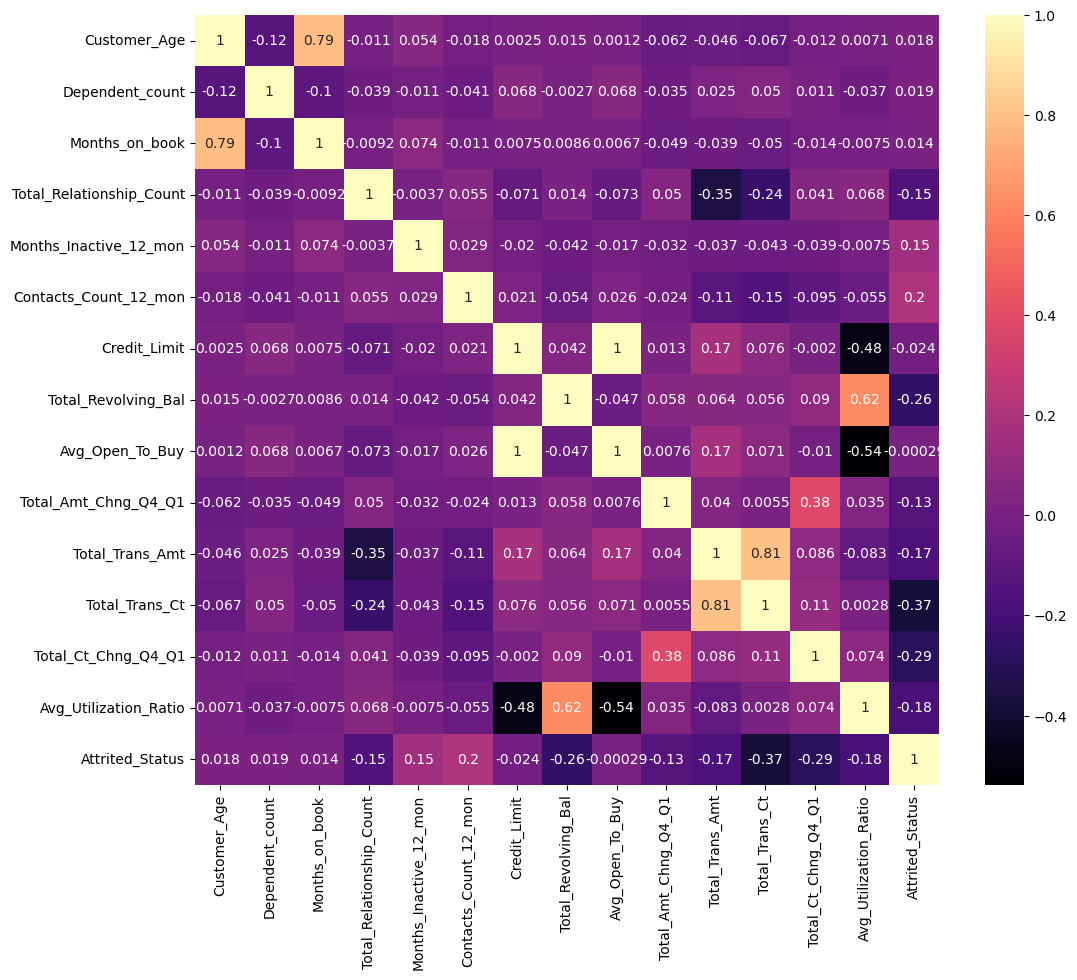

In [14]:
plt.figure(figsize=(12, 10))  # Adjust the width and height to upscale the boxes

# Create the heatmap with a larger figure size
sns.heatmap(numerical_features.corr(), cmap='magma', annot=True)

# Show the plot
plt.show()

##### What questions do we want to know from the data?
1. From all cancellations what are the percentage for these categories?
   1. Gender
   2. Education Level
   3. Marital Status
   4. Annual Salary
   5. Card Type
2. What are the distribution of revovling balance in both existing and attrited customers?
3. Is it possible to classified customer status by using all time transaction count and amount?
4. Is it possible to classified customer status by using the change in transaction count and amount between Q4 and Q1?

In [15]:
att_df = df[df['Attrition_Flag'] == 'Attrited Customer']

In [16]:
sex_att = pd.DataFrame(data=att_df.groupby('Gender')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
sex_att.columns = ['Cancellation_Percentage']
sex_att = sex_att.sort_values(by='Cancellation_Percentage', ascending=False)
sex_att = sex_att.reset_index()
sex_att['Gender'] = sex_att['Gender'].apply(lambda x: 'Female' if x  == 'F' else 'Male')
sex_att

,Gender,Cancellation_Percentage
0,Female,57.160418
1,Male,42.839582


In [17]:
fig = px.bar(
    sex_att, 
    x='Gender', 
    y='Cancellation_Percentage', 
    color='Gender',
    title='Cancellation Percentage by Customer Gender',
    labels={'Gender': 'Gender', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 65] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

In [18]:
edu_att = pd.DataFrame(data=att_df.groupby('Education_Level')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
edu_att.columns = ['Cancellation_Percentage']
edu_att = edu_att.sort_values(by='Cancellation_Percentage', ascending=False)
edu_att = edu_att.reset_index()
edu_att

,Education_Level,Cancellation_Percentage
0,Graduate,29.932391
1,High School,18.807621
2,Unknown,15.734481
3,Uneducated,14.566687
4,College,9.465274
5,Doctorate,5.838967
6,Post-Graduate,5.654579


In [19]:
fig = px.bar(
    edu_att, 
    x='Education_Level', 
    y='Cancellation_Percentage', 
    color='Education_Level', 
    title='Cancellation Percentage by Customer Education Level',
    labels={'Education_Level': 'Education Level', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Education Level',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 35] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

In [20]:
mar_att = pd.DataFrame(data=att_df.groupby('Marital_Status')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
mar_att.columns = ['Cancellation_Percentage']
mar_att = mar_att.sort_values(by='Cancellation_Percentage', ascending=False)
mar_att = mar_att.reset_index()
mar_att

,Marital_Status,Cancellation_Percentage
0,Married,43.577136
1,Single,41.057160
2,Unknown,7.928703
3,Divorced,7.437001


In [21]:
fig = px.bar(
    mar_att, 
    x='Marital_Status', 
    y='Cancellation_Percentage', 
    color='Marital_Status',
    title='Cancellation Percentage by Customer Marital Status',
    labels={'Marital_Status': 'Marital Status ', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 50] 
    ),
    template='plotly_dark'  
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

In [22]:
sal_att = pd.DataFrame(data=att_df.groupby('Income_Category')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
sal_att.columns = ['Cancellation_Percentage']
sal_att = sal_att.sort_values(by='Cancellation_Percentage', ascending=False)
sal_att = sal_att.reset_index()
sal_att

,Income_Category,Cancellation_Percentage
0,Less than $40K,37.615243
1,$40K - $60K,16.656423
2,$80K - $120K,14.874001
3,$60K - $80K,11.616472
4,Unknown,11.493546
5,$120K +,7.744315


In [23]:
fig = px.bar(
    sal_att, 
    x='Income_Category', 
    y='Cancellation_Percentage', 
    color='Income_Category',
    title='Cancellation Percentage by Customer Annual Salary',
    labels={'Income_Category': 'Annual Salary', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Annual Salary',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 40] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

In [24]:
crd_att = pd.DataFrame(data=att_df.groupby('Card_Category')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
crd_att.columns = ['Cancellation_Percentage']
crd_att = crd_att.sort_values(by='Cancellation_Percentage', ascending=False)
crd_att = crd_att.reset_index()
crd_att

,Card_Category,Cancellation_Percentage
0,Blue,93.362016
1,Silver,5.039951
2,Gold,1.290719
3,Platinum,0.307314


In [25]:
fig = px.bar(
    crd_att, 
    x='Card_Category', 
    y='Cancellation_Percentage', 
    color='Card_Category',
    title='Cancellation Percentage by Customer Card Type',
    labels={'Card_Category': 'Card Type', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Card Type',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 100] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

In [26]:
fig = px.box(
    df,
    x='Attrition_Flag',
    y='Total_Revolving_Bal',
    color='Attrition_Flag',
    title='Distribution of Revolving Balance by Attrition Status',
    points='all'
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Attrition Status',
    yaxis_title='Customer Revolving Balance ($)',
    legend_title='Attrition Status'
)

statistics = df.groupby('Attrition_Flag')['Total_Revolving_Bal'].describe()

for attrition_flag in statistics.index:
    stats = statistics.loc[attrition_flag]
    q1 = stats['25%']
    median = stats['50%']
    q3 = stats['75%']
    min_fence = stats['min']
    max_fence = stats['max']

    vertical_positions = {
        'Min': (min_fence, 'left'),
        'Q1': (q1, 'right'),
        'Median': (median, 'left'),
        'Q3': (q3, 'right'),
        'Max': (max_fence, 'left')
    }

    for label, (y, position) in vertical_positions.items():
        ax_offset = -50 if position == 'left' else 50 
        fig.add_annotation(
            x=attrition_flag,
            y=y,
            text=f'{label}: ${y:.2f}',
            showarrow=True,
            arrowhead=1,
            font=dict(color="white"),
            ax=ax_offset,
            ay=0,
            xanchor='right' if position == 'left' else 'left'
        )

fig.show()


In [27]:
fig = px.scatter(
    df,
    y='Total_Trans_Ct',
    x='Total_Trans_Amt',
    color='Attrition_Flag',
    title='Scatter Plot of Total Transaction Amount vs. Total Transaction Count',
    labels={'Total_Trans_Ct': 'Total Transaction Count', 'Total_Trans_Amt': 'Total Transaction Amount ($)'},
    template='plotly_dark'
)

fig.update_layout(
    yaxis_title='Total Transaction Count',
    xaxis_title='Total Transaction Amount ($)',
    legend_title='Attrition Status',
)

fig.show()

In [28]:
fig = px.scatter(
    df,
    y='Total_Ct_Chng_Q4_Q1',
    x='Total_Amt_Chng_Q4_Q1',
    color='Attrition_Flag',
    title='Scatter Plot of Total Transaction Amount vs. Total Transaction Count change from Q4 to Q1',
    labels={'Total_Ct_Chng_Q4_Q1': 'Total Transaction Count', 'Total_Amt_Chng_Q4_Q1': 'Total Transaction Amount'},
    template='plotly_dark'
)

fig.update_layout(
    yaxis_title='Total Transaction Count',
    xaxis_title='Total Transaction Amount',
    legend_title='Attrition Status',
)

fig.show()